In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [134]:
data=pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [135]:
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

In [136]:
data['active']=data['confirmed']-data['deaths']-data['recovered']

In [137]:
top=data[data['date']==data['date'].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [138]:
w=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
w

,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41
...,...,...,...,...
182,West Bank and Gaza,10621,6791,78
183,Western Sahara,10,1,1
184,Yemen,1691,375,483
185,Zambia,4552,1597,140


In [139]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
plt.tight_layout()
fig.show()

<Figure size 640x480 with 0 Axes>

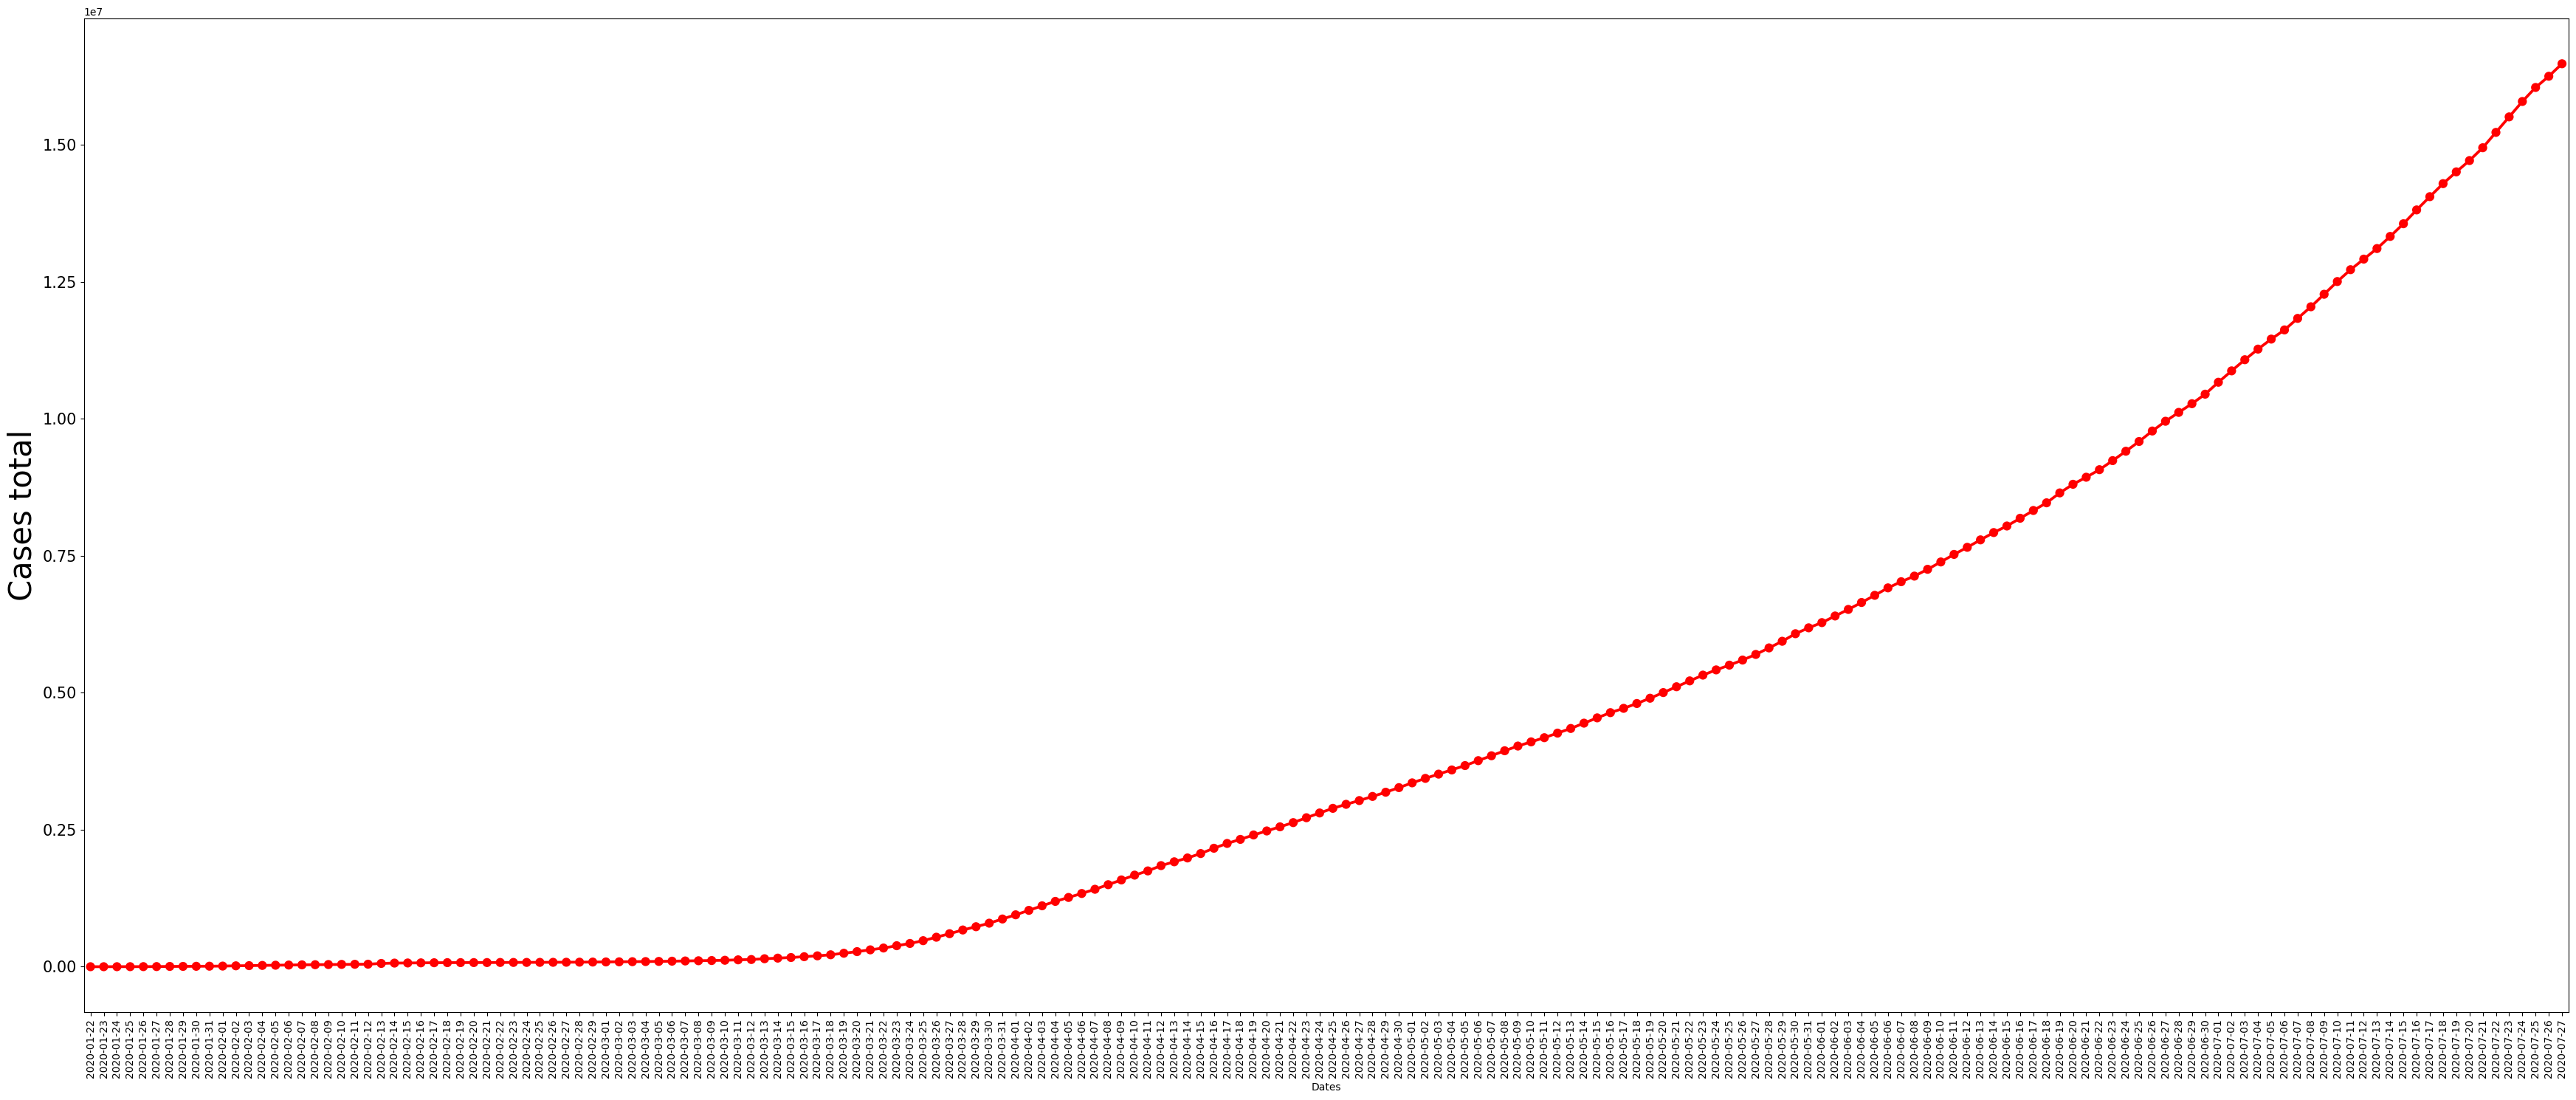

In [140]:
#plot for confirmed cases
plt.figure(figsize=(35,15))

#t_cases=data.groupby('date')['date','confirmed'].sum().reset_index()
t_cases=data.groupby('date')['confirmed'].sum().reset_index()
t_cases['date']=pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases.date.dt.date,y=t_cases.confirmed,color='r')
a.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)
plt.tight_layout()
plt.show()

In [141]:
t_actives=top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
t_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


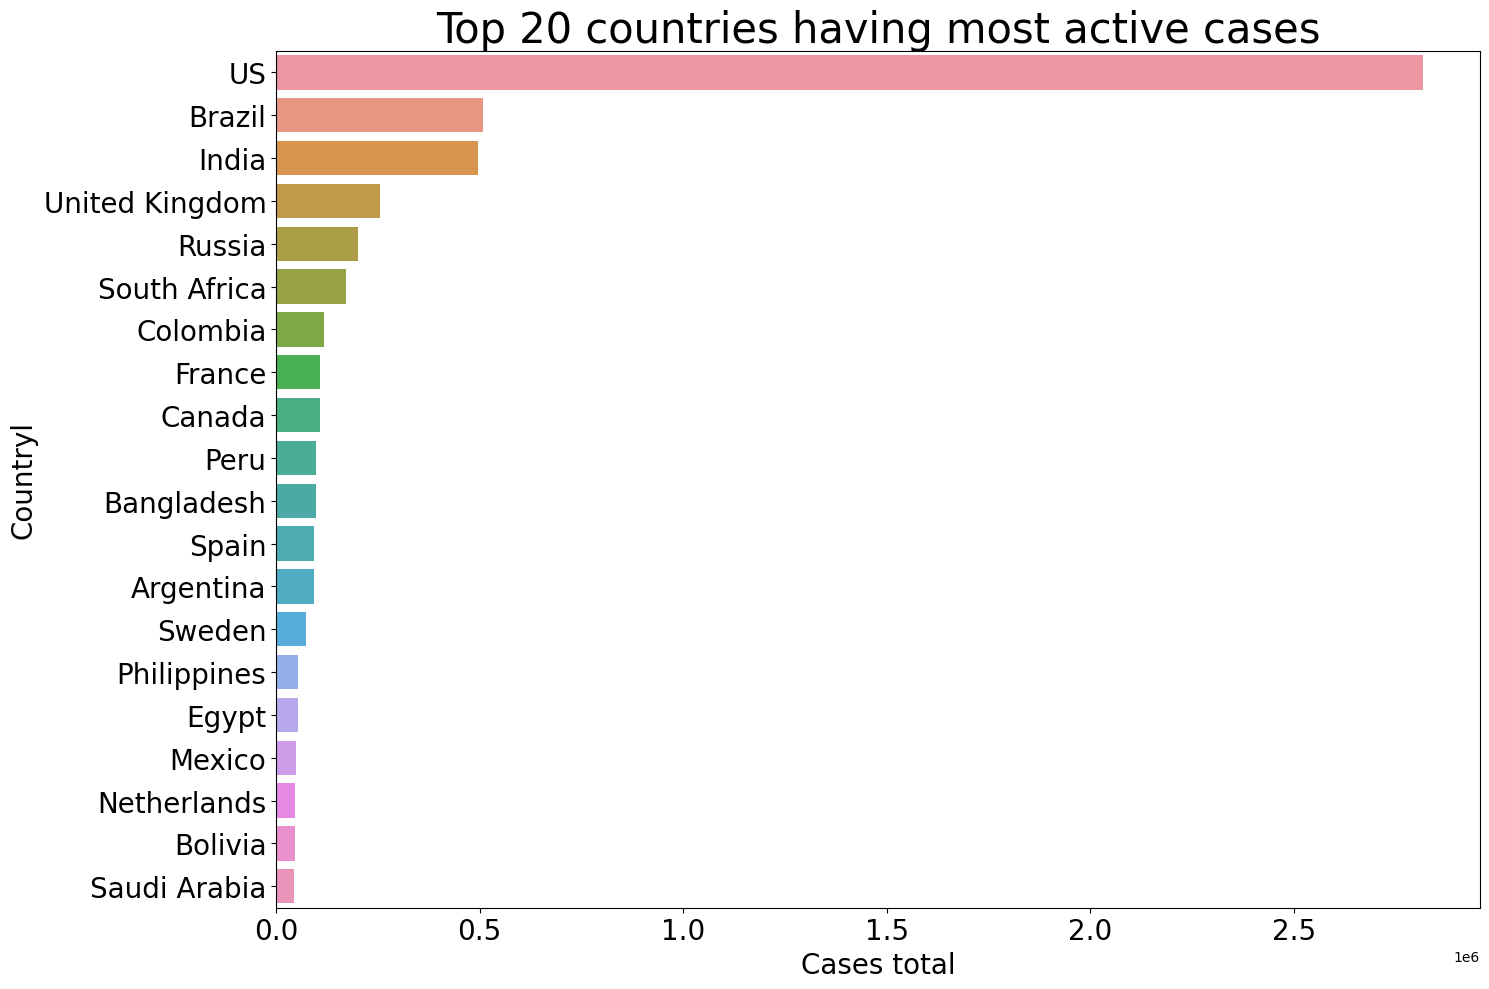

In [142]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30)
a=sns.barplot(x=t_actives.active,y=t_actives.country)
#for i,(value,name) in enumerate(zip(t_actives.active,t_actives.country)):
#    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Countryl',fontsize=20)
plt.tight_layout()
plt.show()

In [143]:
#Top 20 countries having most death
t_deaths=top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
t_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


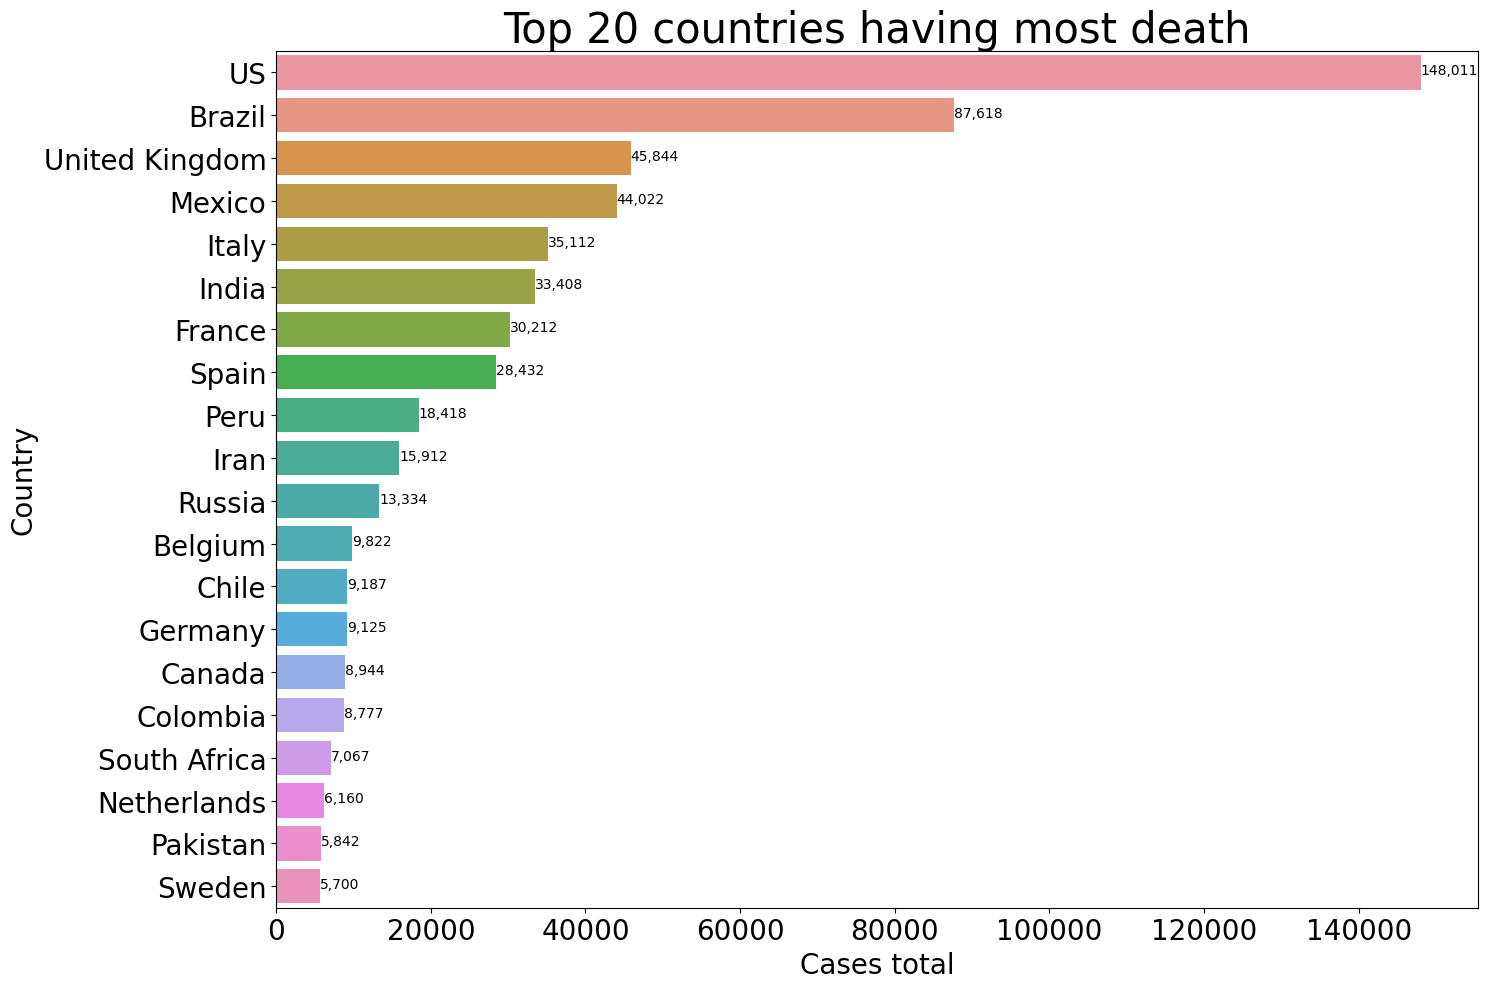

In [144]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most death',fontsize=30)
a=sns.barplot(x=t_deaths.deaths,y=t_deaths.country)
for i,(value,name) in enumerate(zip(t_deaths.deaths,t_deaths.country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.tight_layout()
plt.show()

In [145]:
recover=top.groupby(by='country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()
recover


,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


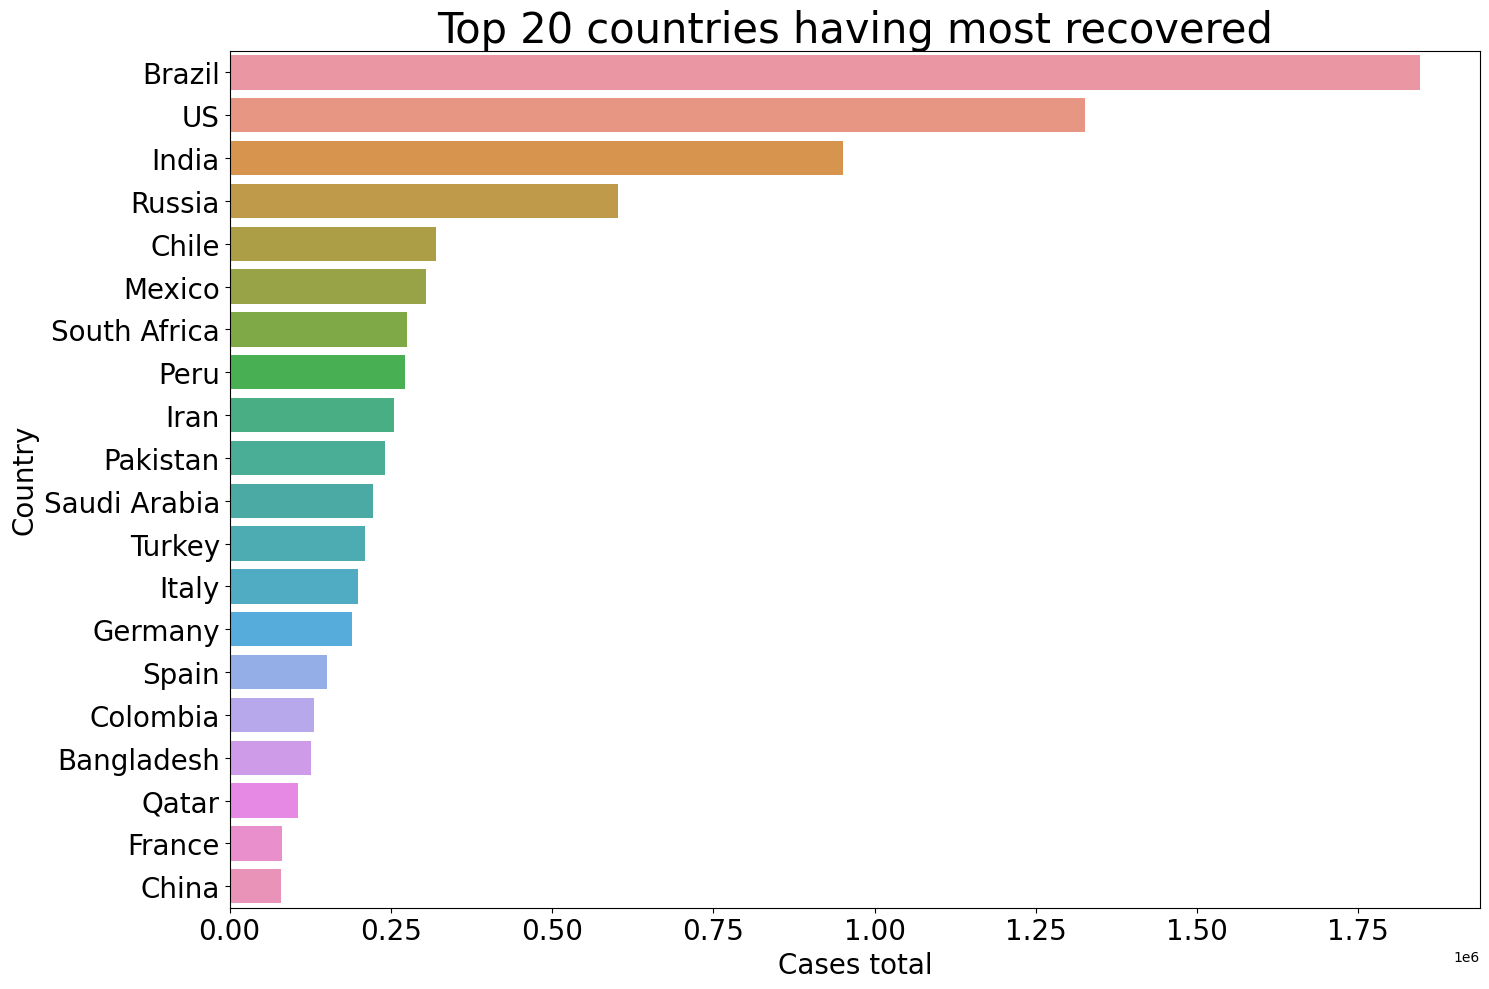

In [146]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most recovered',fontsize=30)
a=sns.barplot(x=recover.recovered,y=recover.country)
#for i,(value,name) in enumerate(zip(recover.recovered,recover.country)):
#    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.tight_layout()
plt.show()

In [147]:
Brazil=data[data.country=='Brazil']
Brazil=Brazil.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
Brazil.head()

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [148]:
# Data of China
china = data[data.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
china.head()

,date,recovered,deaths,confirmed,active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970


In [149]:
# Data of USA
us = data[data.country == 'US']
us = us.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us.head()

,date,recovered,deaths,confirmed,active
0,2020-02-24,5,0,15,10
1,2020-02-25,6,0,15,9
2,2020-02-26,6,0,15,9
3,2020-02-27,6,0,16,10
4,2020-02-28,7,0,16,9


In [150]:
# Data of Italy
italy = data[data.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy.head()

,date,recovered,deaths,confirmed,active
0,2020-01-31,0,0,2,2
1,2020-02-01,0,0,2,2
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,2,2
4,2020-02-04,0,0,2,2


In [151]:
Russia=data[data.country=='US']
Russia=Russia.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
Russia=Russia.iloc[10:].reset_index().drop('index',axis=1)
Russia.head()

,date,recovered,deaths,confirmed,active
0,2020-02-01,0,0,8,8
1,2020-02-02,0,0,8,8
2,2020-02-03,0,0,11,11
3,2020-02-04,0,0,11,11
4,2020-02-05,0,0,11,11


In [152]:
India=data[data.country=='US']
India=India.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
India=India.iloc[9:].reset_index().drop('index',axis=1)
India.head()

,date,recovered,deaths,confirmed,active
0,2020-01-31,0,0,7,7
1,2020-02-01,0,0,8,8
2,2020-02-02,0,0,8,8
3,2020-02-03,0,0,11,11
4,2020-02-04,0,0,11,11


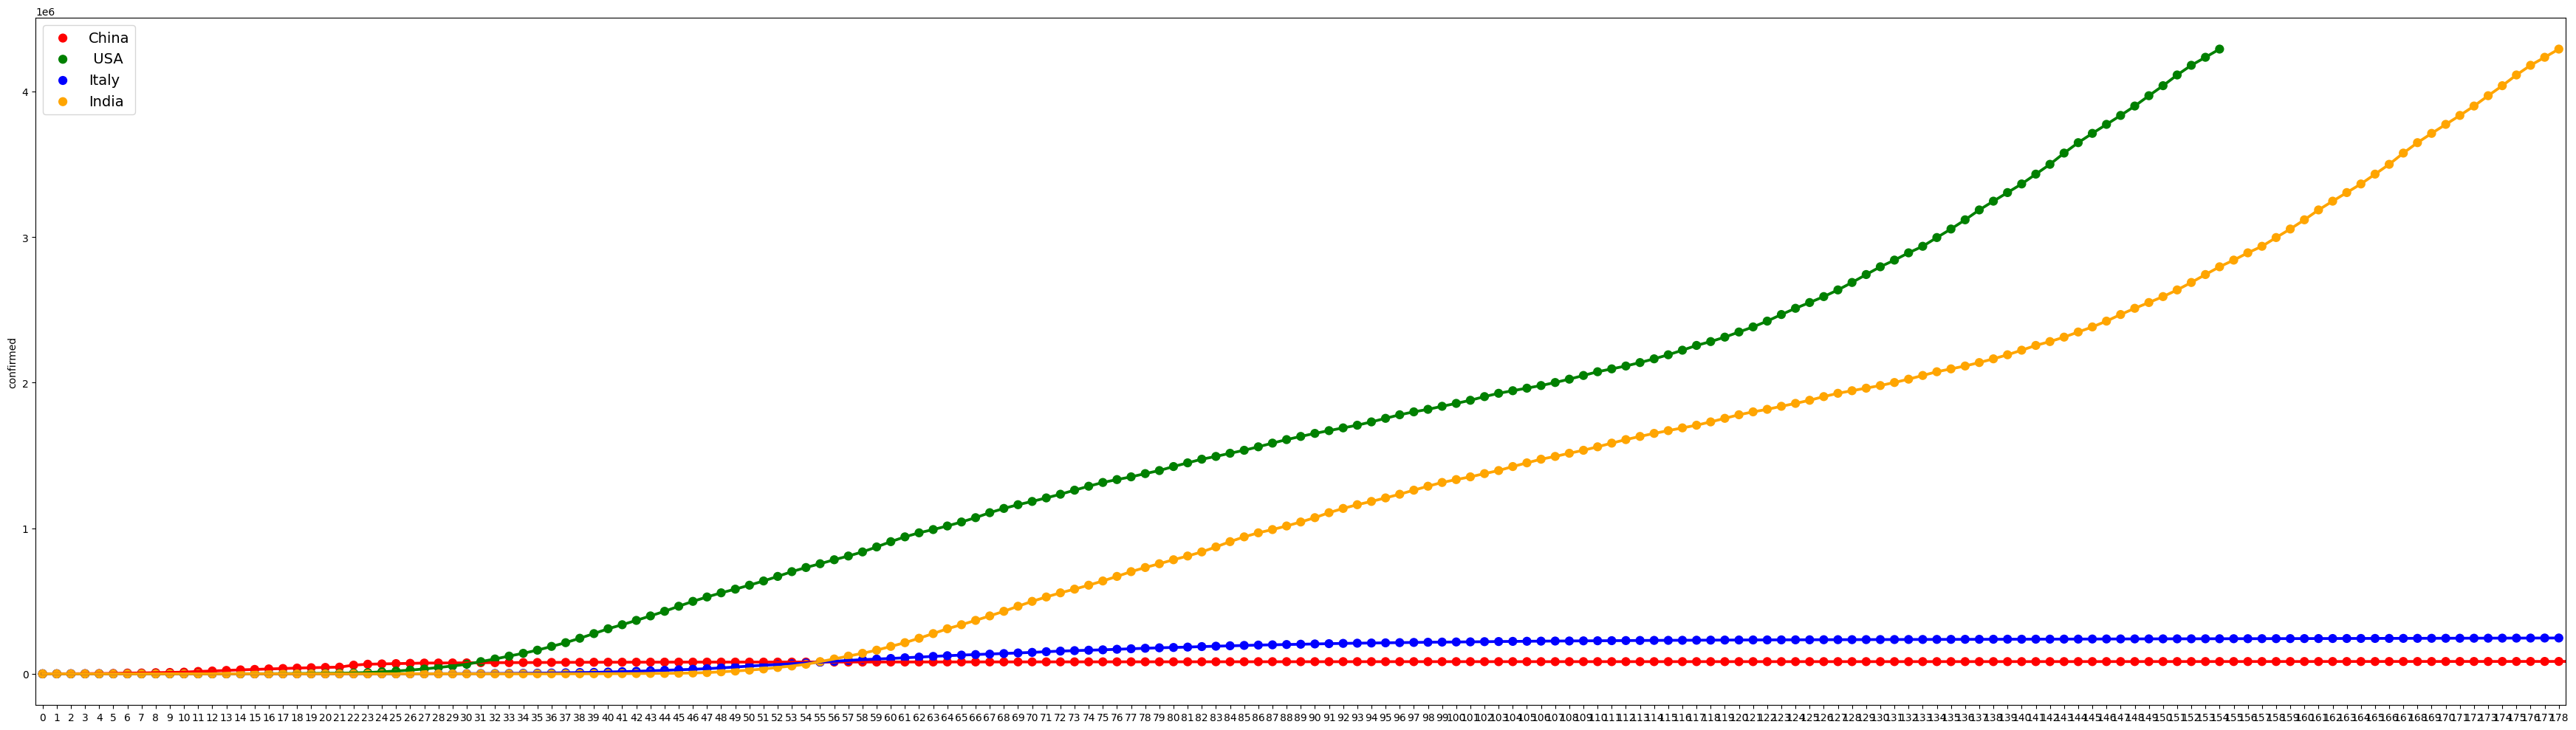

In [153]:
plt.figure(figsize=(35, 10))

sns.pointplot(x=china.index, y=china.confirmed, color='red', label="China")
sns.pointplot(x=us.index, y=us.confirmed, color='green', label=" USA")
sns.pointplot(x=italy.index, y=italy.confirmed, color='blue', label="Italy")
sns.pointplot(x=India.index, y=India.confirmed, color='orange', label="India")
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

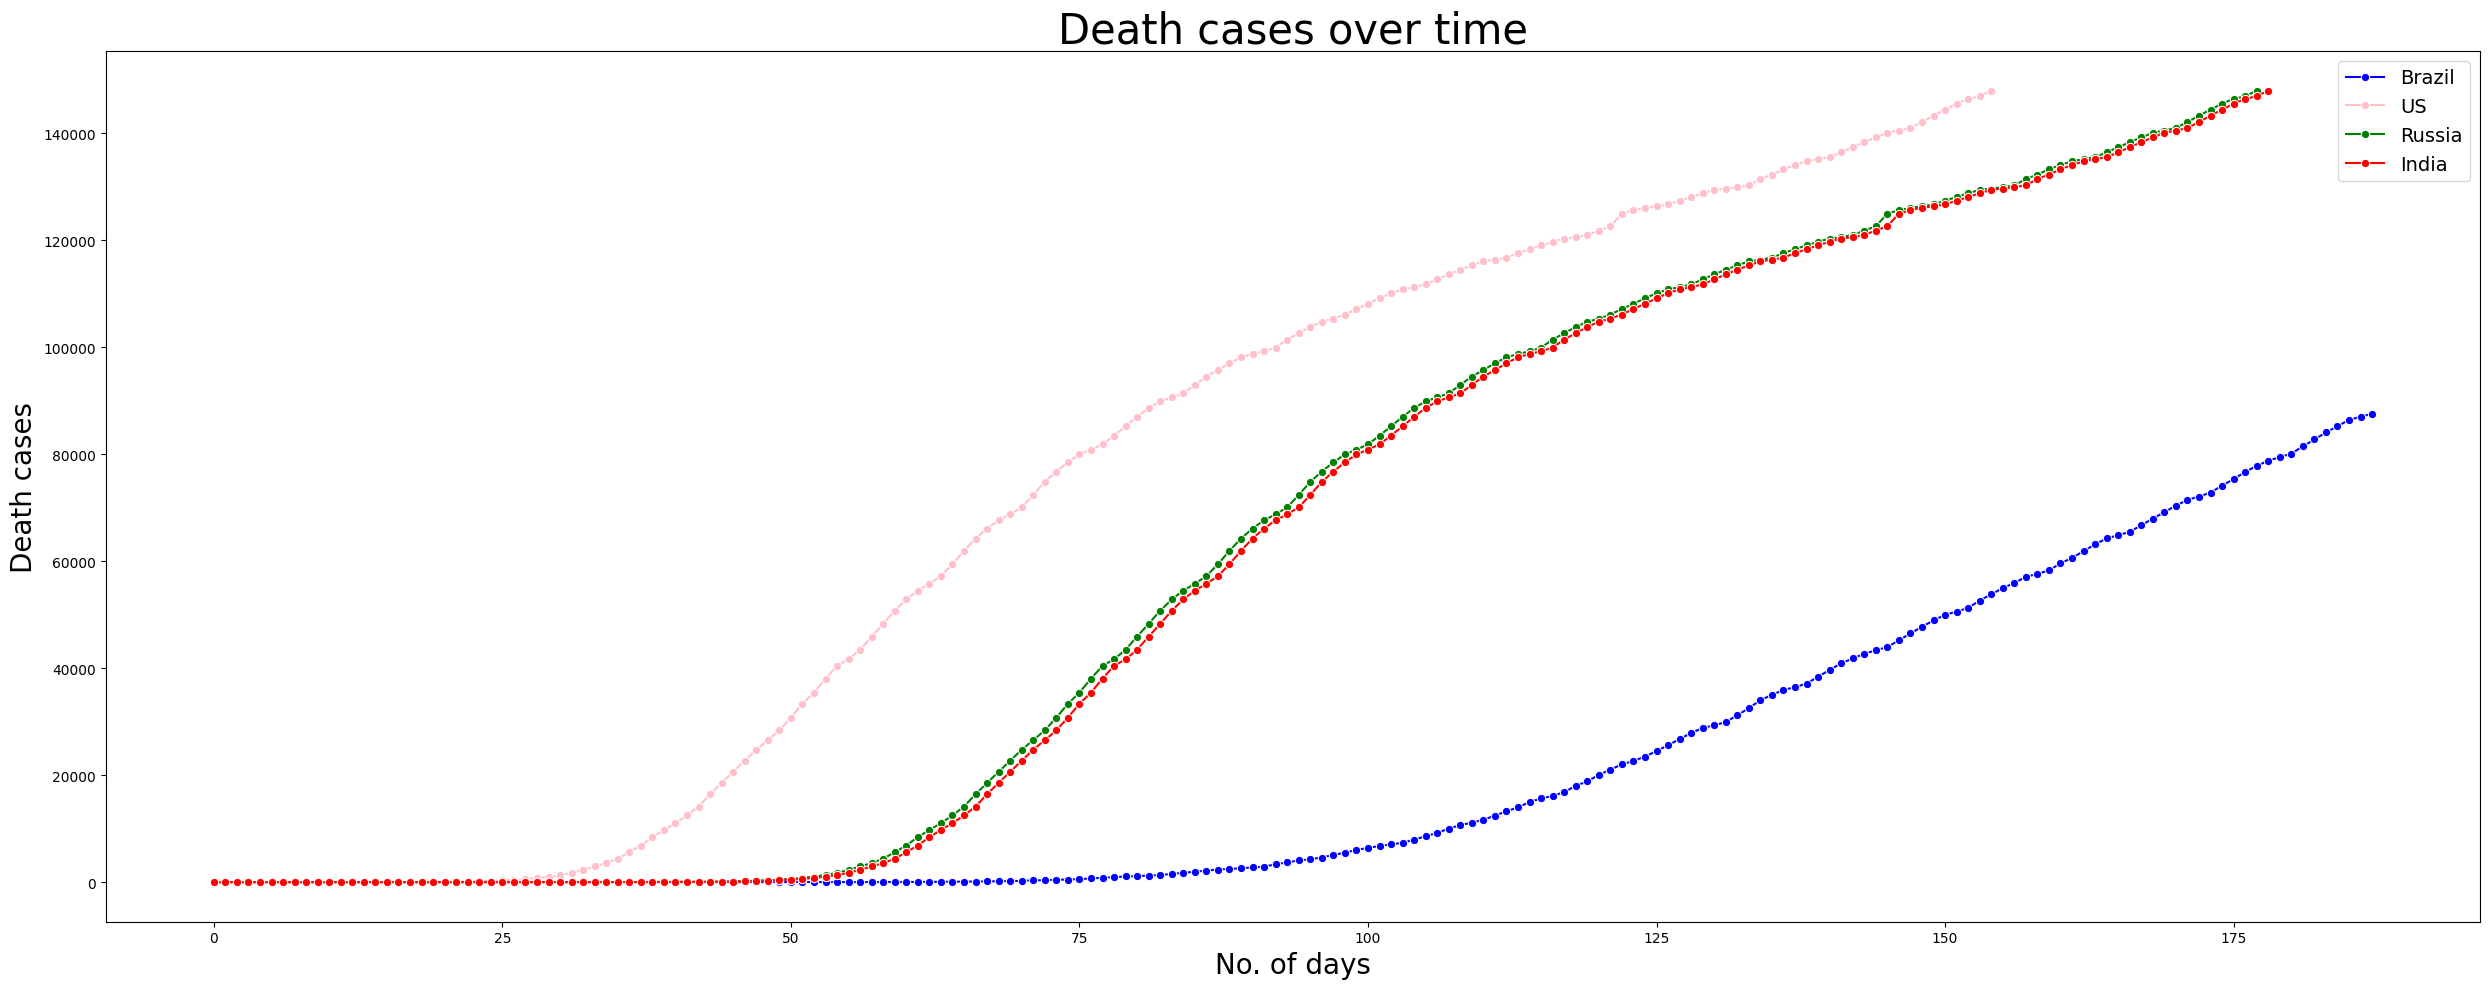

In [154]:
plt.figure(figsize=(25, 10))

# Line plot for Brazil with blue color
sns.lineplot(x=Brazil.index, y=Brazil.deaths, color='blue', label='Brazil', marker='o')

# Line plot for US with pink color
sns.lineplot(x=us.index, y=us.deaths, color='pink', label='US', marker='o')

# Line plot for Russia with green color
sns.lineplot(x=Russia.index, y=Russia.deaths, color='green', label='Russia', marker='o')

# Line plot for India with red color
sns.lineplot(x=India.index, y=India.deaths, color='red', label='India', marker='o')

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
plt.title('Death cases over time', fontsize=30)
plt.tight_layout()
plt.legend(fontsize=14)  # Add legend to differentiate the series
plt.show()

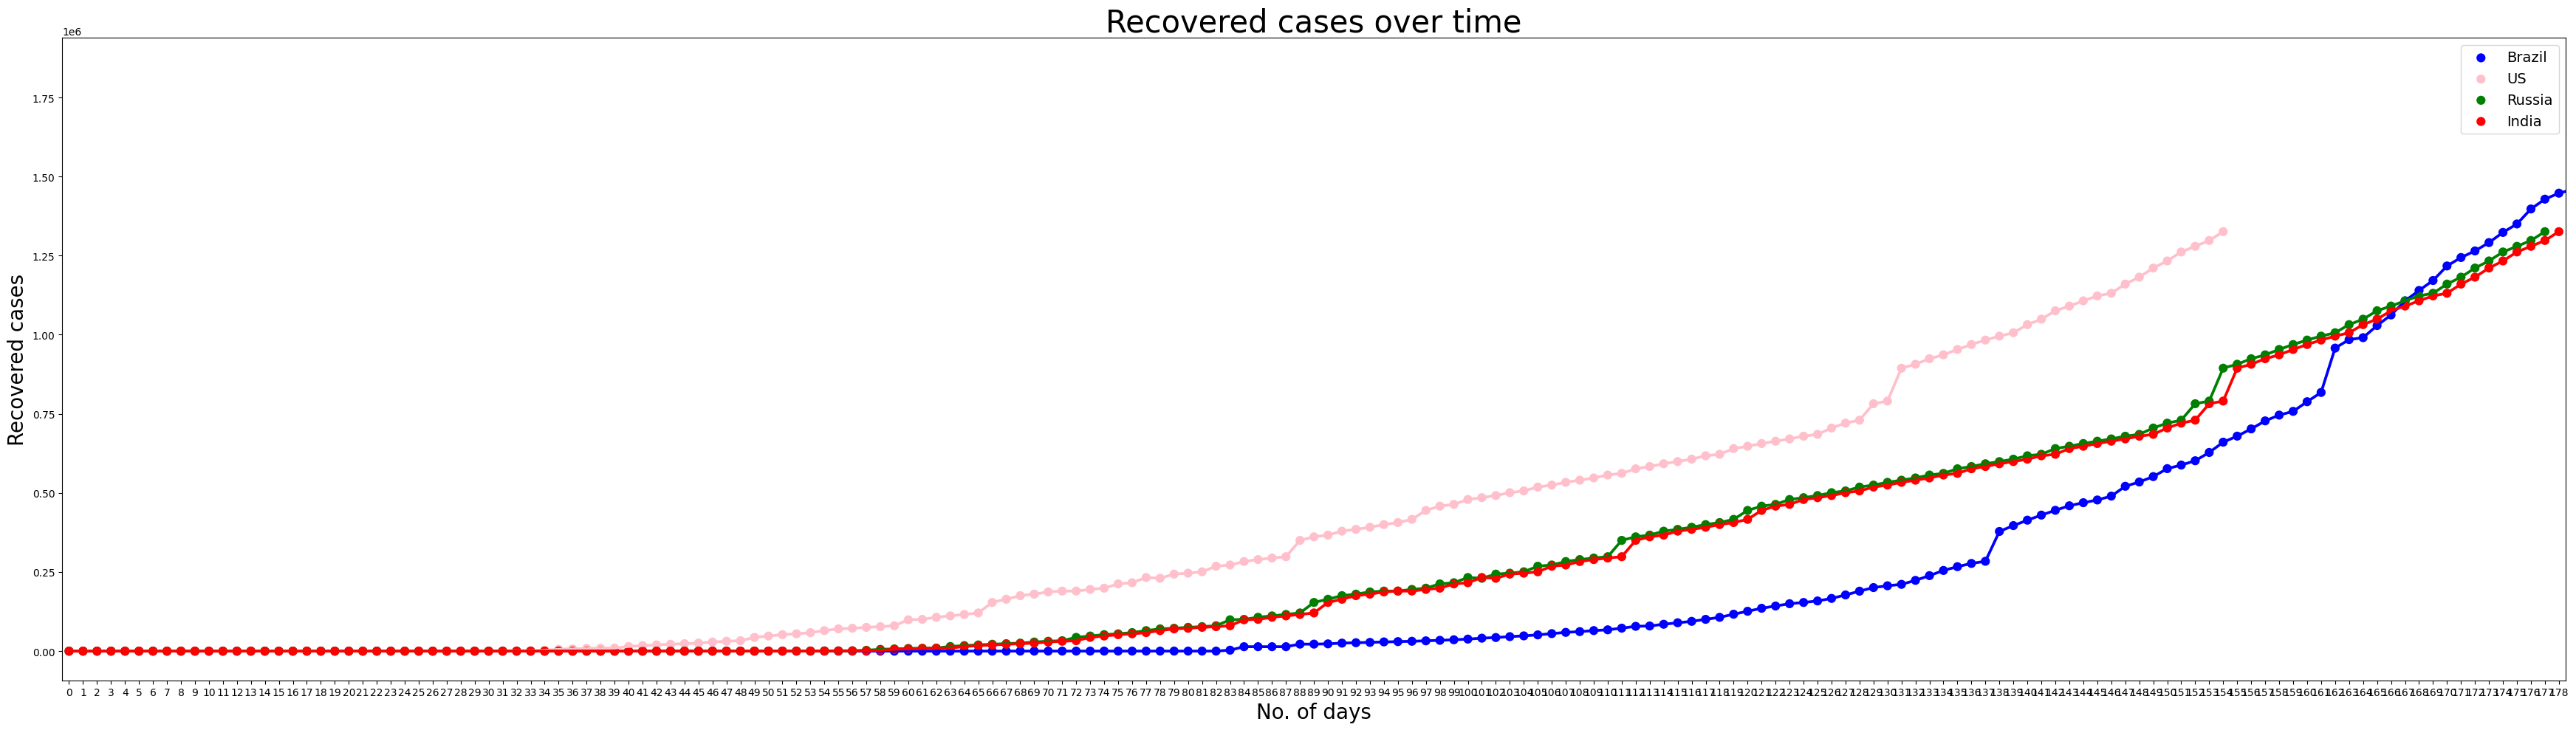

In [155]:
plt.figure(figsize=(35, 10))

# Point plot for Brazil with blue color
sns.pointplot(x=Brazil.index, y=Brazil.recovered, color='blue', label='Brazil')

# Point plot for US with pink color
sns.pointplot(x=us.index, y=us.recovered, color='pink', label='US')

# Point plot for Russia with green color
sns.pointplot(x=Russia.index, y=Russia.recovered, color='green', label='Russia')

# Point plot for India with red color
sns.pointplot(x=India.index, y=India.recovered, color='red', label='India')

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Recovered cases', fontsize=20)
plt.title('Recovered cases over time', fontsize=30)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [156]:
from prophet import Prophet

In [157]:
data.groupby('date').sum().head()

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


In [158]:
total_active=data['active'].sum()
print('Total no.of active COVID 19 CASES',total_active)

Total no.of active COVID 19 CASES 396715350


In [159]:
data['Active']=data['confirmed']-data['deaths']+data['recovered']

In [160]:
confirmed = data.groupby('date').sum()['confirmed'].reset_index()
deaths = data.groupby('date').sum()['deaths'].reset_index()
recovered = data.groupby('date').sum()['recovered'].reset_index()
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [161]:
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [162]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [163]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cjtunmt/tc93x9oy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cjtunmt/xyeeozqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71570', 'data', 'file=/tmp/tmp6cjtunmt/tc93x9oy.json', 'init=/tmp/tmp6cjtunmt/xyeeozqv.json', 'output', 'file=/tmp/tmp6cjtunmt/prophet_model2vwjha1o/prophet_model-20231003091950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:19:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:19:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [164]:
future=m.make_future_dataframe(periods=7,freq='D')
future.tail()

,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [165]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674386e+07,1.658980e+07,1.689554e+07
191,2020-07-31,1.695903e+07,1.679873e+07,1.712454e+07
192,2020-08-01,1.716665e+07,1.699773e+07,1.734473e+07
193,2020-08-02,1.736416e+07,1.719693e+07,1.753671e+07
194,2020-08-03,1.755879e+07,1.739567e+07,1.773544e+07


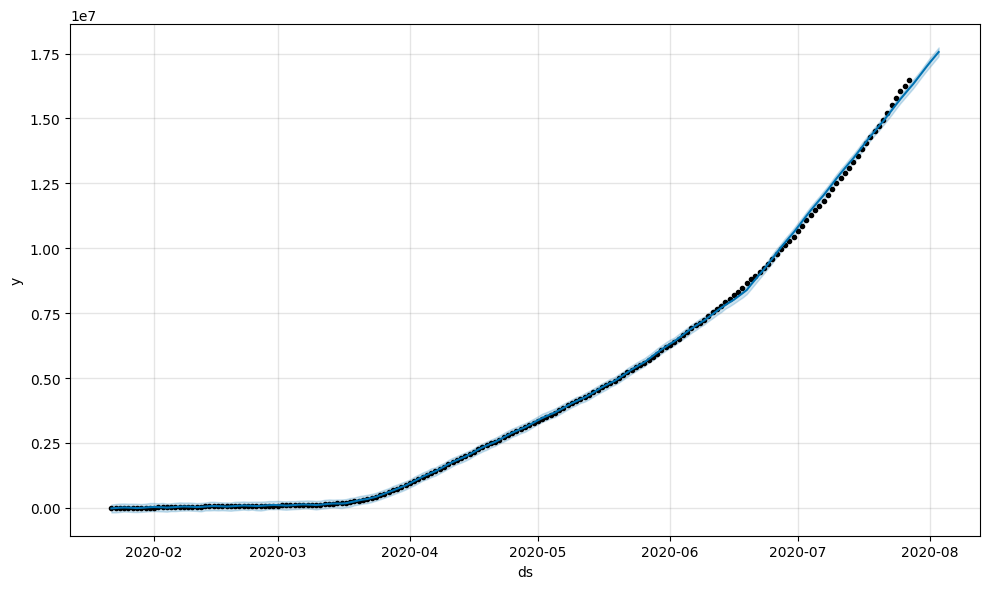

In [166]:
confirmed_forecast_plot = m.plot(forecast)
plt.tight_layout()
plt.show()

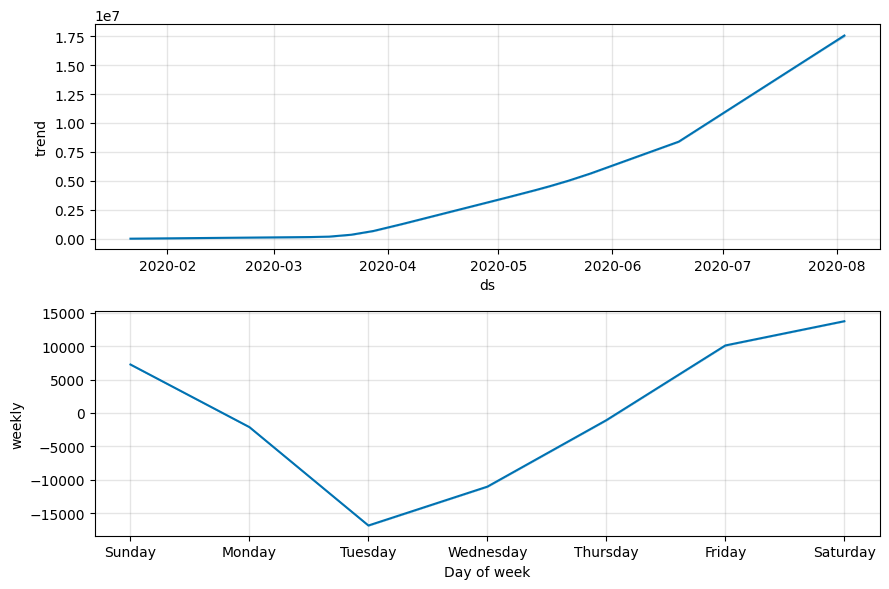

In [167]:
confirmed_forecast_plot = m.plot_components(forecast)
plt.tight_layout()
plt.show()

In [168]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [169]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cjtunmt/eymp_6vl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cjtunmt/115r1t52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72111', 'data', 'file=/tmp/tmp6cjtunmt/eymp_6vl.json', 'init=/tmp/tmp6cjtunmt/115r1t52.json', 'output', 'file=/tmp/tmp6cjtunmt/prophet_modellh_2ohc4/prophet_model-20231003091951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:19:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:19:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [170]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,663508.283269,661598.198592,665683.789357
191,2020-07-31,669024.787703,666823.585024,671296.296556
192,2020-08-01,673907.743013,671490.330782,676214.579951
193,2020-08-02,678044.996954,675567.589673,680636.697681
194,2020-08-03,682336.032139,679383.438518,685554.215221


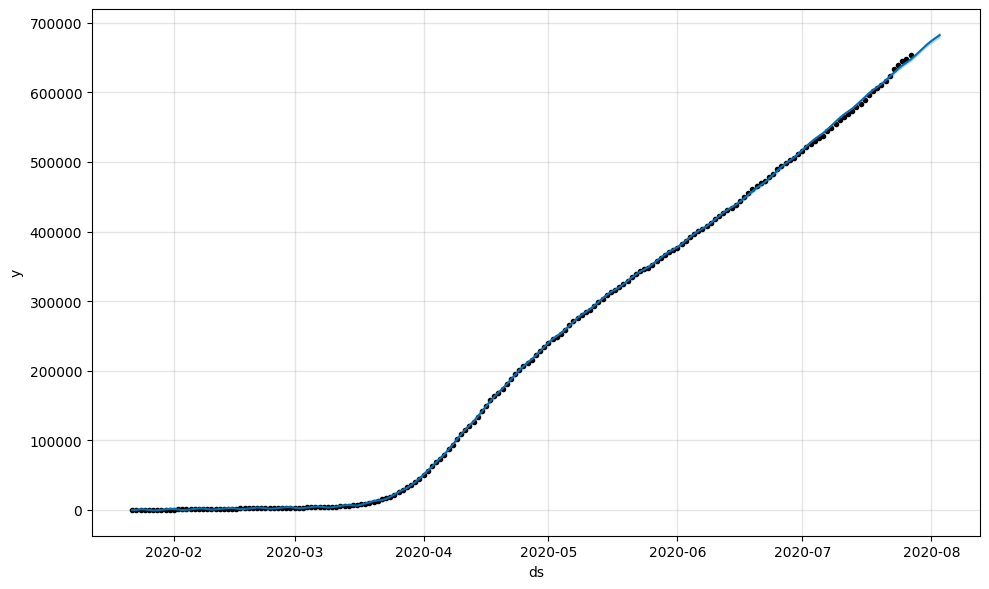

In [171]:
deaths_forecast_plot = m.plot(forecast)
plt.tight_layout()
plt.show()

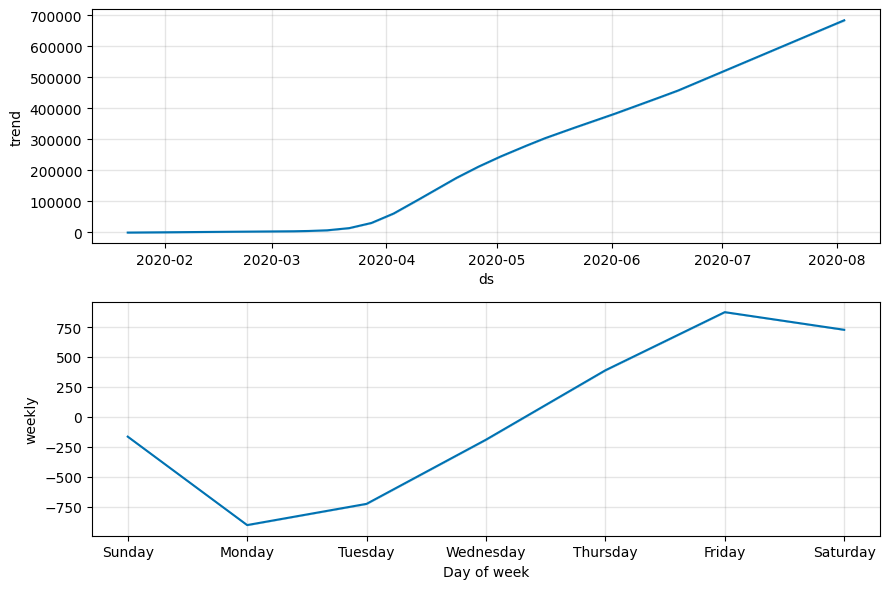

In [172]:
deaths_forecast_plot = m.plot_components(forecast)
plt.tight_layout()
plt.show()

In [173]:
recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(recovered['ds'])

In [174]:
m = Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=21,freq='D')
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cjtunmt/39h49675.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6cjtunmt/2o_xh152.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96414', 'data', 'file=/tmp/tmp6cjtunmt/39h49675.json', 'init=/tmp/tmp6cjtunmt/2o_xh152.json', 'output', 'file=/tmp/tmp6cjtunmt/prophet_modelftda0nc8/prophet_model-20231003091953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16
208,2020-08-17


In [175]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2020-08-13,1.151541e+07,1.137750e+07,1.165884e+07
205,2020-08-14,1.165704e+07,1.150962e+07,1.181160e+07
206,2020-08-15,1.179743e+07,1.163512e+07,1.196301e+07
207,2020-08-16,1.192356e+07,1.175341e+07,1.210215e+07
208,2020-08-17,1.206021e+07,1.188140e+07,1.225104e+07


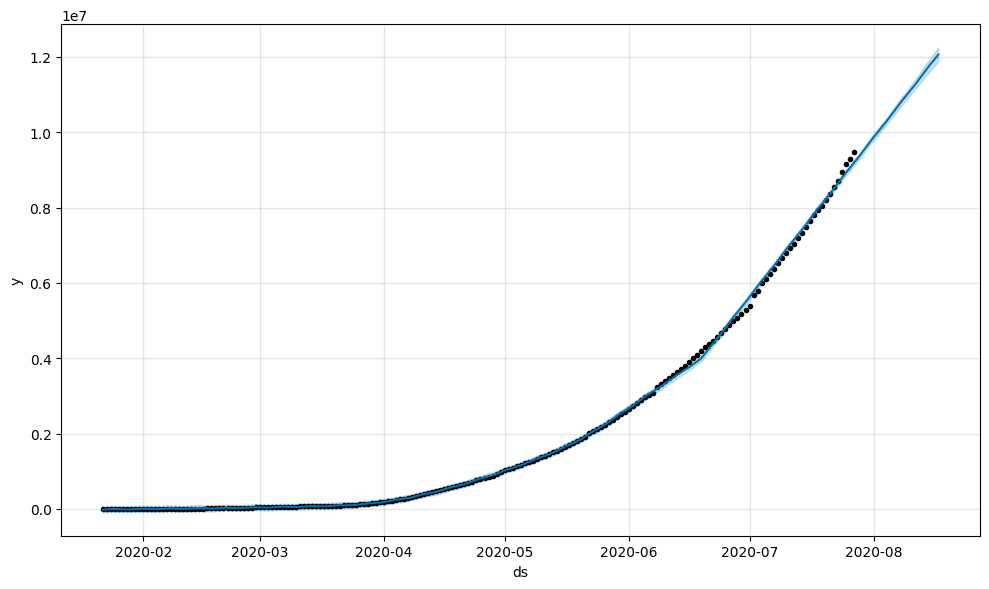

In [176]:
recovered_forecast_plot = m.plot(forecast)
plt.tight_layout()
plt.show()

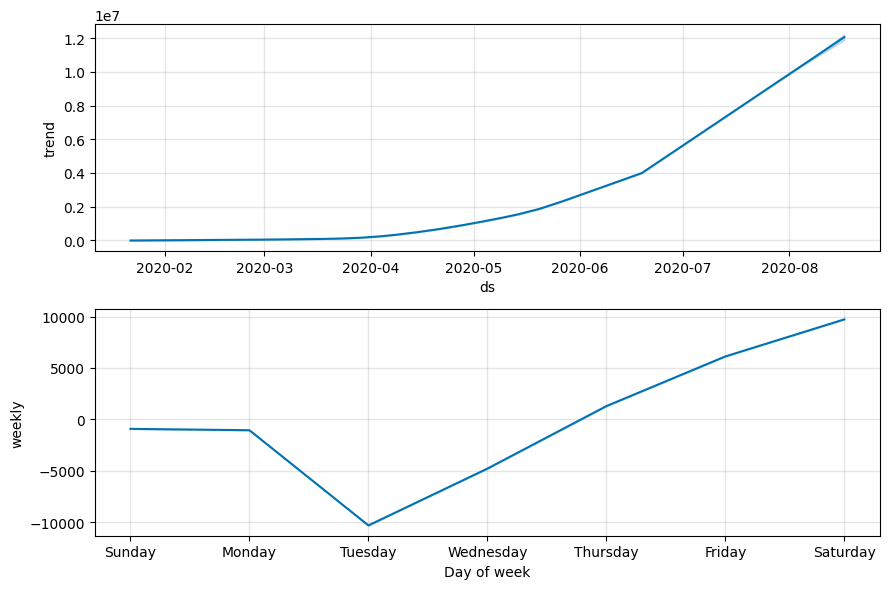

In [177]:
recovered_forecast_plot = m.plot_components(forecast)
plt.tight_layout()
plt.show()

In [178]:
forecast['yhat'] = forecast['yhat'].astype(int)
forecast['yhat']

0        -18594
1        -11289
2         -5232
3          -403
4         -9837
         ...   
204    11515413
205    11657036
206    11797430
207    11923560
208    12060214
Name: yhat, Length: 209, dtype: int64